# <center> Sentiment Analysis of Steam's best selling games as February 2019

    

## <center> Nicolò Della Bianca

---
### <center> Introduction

The aim of this project is to compute the Sentiment Analysis of Steam's best selling games reviews as February 2019.

Sentiment Analysis is a Natural Language Processing (NLP) technique that allows the identification of the underlying sentiment behind a piece of text.
This methodology is very useful in order to determine and categorize customers' opinions about a product, a service or an idea.
It involves the usage of data mining, machine learning and artificial intelligence to mine text for sentiment and subjective information.
   
Sentiment analysis tools can be used by organizations for a variety of applications, including:

* Identifying *brand awareness, reputation and popularity* at a specific moment or over time;
* Tracking *consumer reception* of new products or features;
* Evaluating the *success of a marketing campaign*;
* Pinpointing the *target audience or demographics*;
* Collecting *customer feedback* from social media, websites or online forms;
* Conducting *market research*;
* Categorizing *customer service requests*.

For instance, sentiment analysis may be performed on Twitter to determine overall opinion on a particular trending topic. Companies and brands often utilize sentiment analysis to monitor brand reputation across social media platforms or across the web as a whole.

One of the most widely used applications for sentiment analysis is for monitoring call center and omnichannel customer support performance. In addition, sentiment analysis is increasingly utilized for overall brand monitoring purposes.

Moreover, sentiment analysis has been used by political candidates and administrations to monitor overall opinions about policy changes and campaign announcements, enabling them to better relate to voters and constituents. 

In order to execute our Sentiment Analysis I decided to use a dataset regarding the [Steam's best selling games reviews as February 2019](https://www.kaggle.com/luthfim/steam-reviews-dataset). This is composed by almost 435 thousand rows.

The peculiarity is that, in addition to the reviews, there is a "Recommendation" column that identifies whether the game reviewed by a user is recommended by him or not. Therefore, this allows us to use the abovementioned column as a benchmark for our analysis.

In particular, each row contains 8 columns, which are:
- `date_posted`, which identifies the date when the review has been written;
- `funny`, which counts the number of users that think the review is funny;
- `helpful`, which counts the number of users that think the review is helpful;
- `hour_played`, which identifies the number of hours played by the user who wrote the review;
- `is_early_access_review`, if the game has been played by the user before the official launch;
- `recomendation`, which identifies whether the game is recommended or not;
- `review`, which contains the feedback of the game written by the user;
- `title`, which describes the title of the game taken into account.

Following, it is possible to have a view of the dataset:

In [4]:
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


---
### <center> Dataset Reading

The first step was to read the dataset. I decided to use the `pandas` library for data management and the `pickle` library for saving binary files to speed up the saving and retrieval of intermediate data in the case of large datasets.

In [1]:
import pandas as pd
import pickle

I proceeded reading the dataset in *csv* format and saving it in *pickle* format with the **dump** function.

In [2]:
df = pd.read_csv("dataset.csv", low_memory = False)
with open ("dataset.pkl", "wb") as f:
    pickle.dump(df, f)

Lastly, I opened with the **load** function the file we have just created as a *DataFrame*.

In [3]:
with open ("dataset.pkl", "rb") as f:
    df = pickle.load(f)

---
### <center> Dataset Cleaning

The next step was concerning the preparation of the data. To do so, I started checking the range of values of each numerical column by using the **describe()** method.



In [5]:
df.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


The describe() method highlighted the presence of some incorrect data regarding the *funny* and *helpful* columns. These values are probably the result of mistakes in the data extraction phase. For this reason, I decided to remove the outliers taking advantage of the *Z- Score*, that helps to understand that how far is the data point from the mean.

In [6]:
from scipy import stats
import numpy as np

threshold_z = 3

zfunny = np.abs(stats.zscore(df["funny"]))
outlier_indices = np.where(zfunny > threshold_z)[0]
df = df.drop(outlier_indices)

zhelpful = np.abs(stats.zscore(df["helpful"]))
outlier_indices = np.where(zhelpful > threshold_z)[0]
df = df.drop(outlier_indices)

df.describe()

,funny,helpful,hour_played
count,434501.000000,434501.000000,434501.000000
mean,0.319643,0.706829,364.065843
std,19.620751,51.447298,545.393231
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,62.000000
50%,0.000000,0.000000,190.000000
75%,0.000000,0.000000,450.000000
max,7472.000000,28171.000000,31962.000000


At this point, I checked if there are some missing values by using the **count()** method.

In [7]:
display(df.count())

date_posted               434501
funny                     434501
helpful                   434501
hour_played               434501
is_early_access_review    434501
recommendation            434501
review                    432987
title                     434501
dtype: int64

The result shows that the review column presents some missing values. Consequently, I deleted the rows containing an empty review by using **dropna()**. In addition, I set *inplace* as True in order to avoid mismatching indexes.

In [8]:
df.dropna(subset = ["review"], inplace = True)

I also removed all the punctuation from the reviews.

In [9]:
import string

In [10]:
def remove_punctuation(s):
    for c in string.punctuation:
        s = s.replace(c, '')
    return s

In [11]:
df["review"] = df["review"].apply(remove_punctuation)

Then, considering that the *date_posted*, *hour_played* and *is_early_access_review* columns are not useful for our scope, I deleted them taking advantage of the **drop()** method.

In [12]:
df = df.drop(["date_posted"],  axis = 1)
df = df.drop(["hour_played"],  axis = 1)
df = df.drop(["is_early_access_review"],  axis = 1)

---
### <center> Plotting Data

An important part of the analysis regards the data visualization. In fact, it allows to understand immediately the meaning of a big set of data.

At this scope, I took advantage of the `seaborn` and the `matplotlib.pyplot` libraries to easily plot the data.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Overall recommendation balance
To verify how the *recommendation* variable is distributed (i.e., what's the percentage of “Recommended” and “Not recommended” with respect to the total size of the dataset), I decided to plot its balancing.

<Axes: xlabel='count', ylabel='recommendation'>

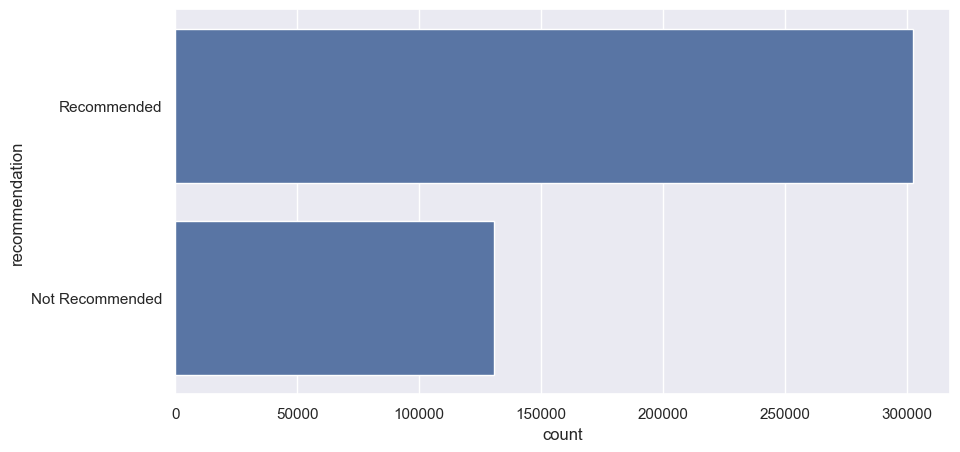

In [14]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(y = "recommendation", data = df)

#### Individual recommendation balance
More specifically, following the same logic, I wanted to check how the *recommendation* variable is distributed for each game. Due to the big difference in the amount of reviews for each game, from the plot it is possible to see only the values concerning the most reviewed games. 

<Axes: xlabel='count', ylabel='title'>

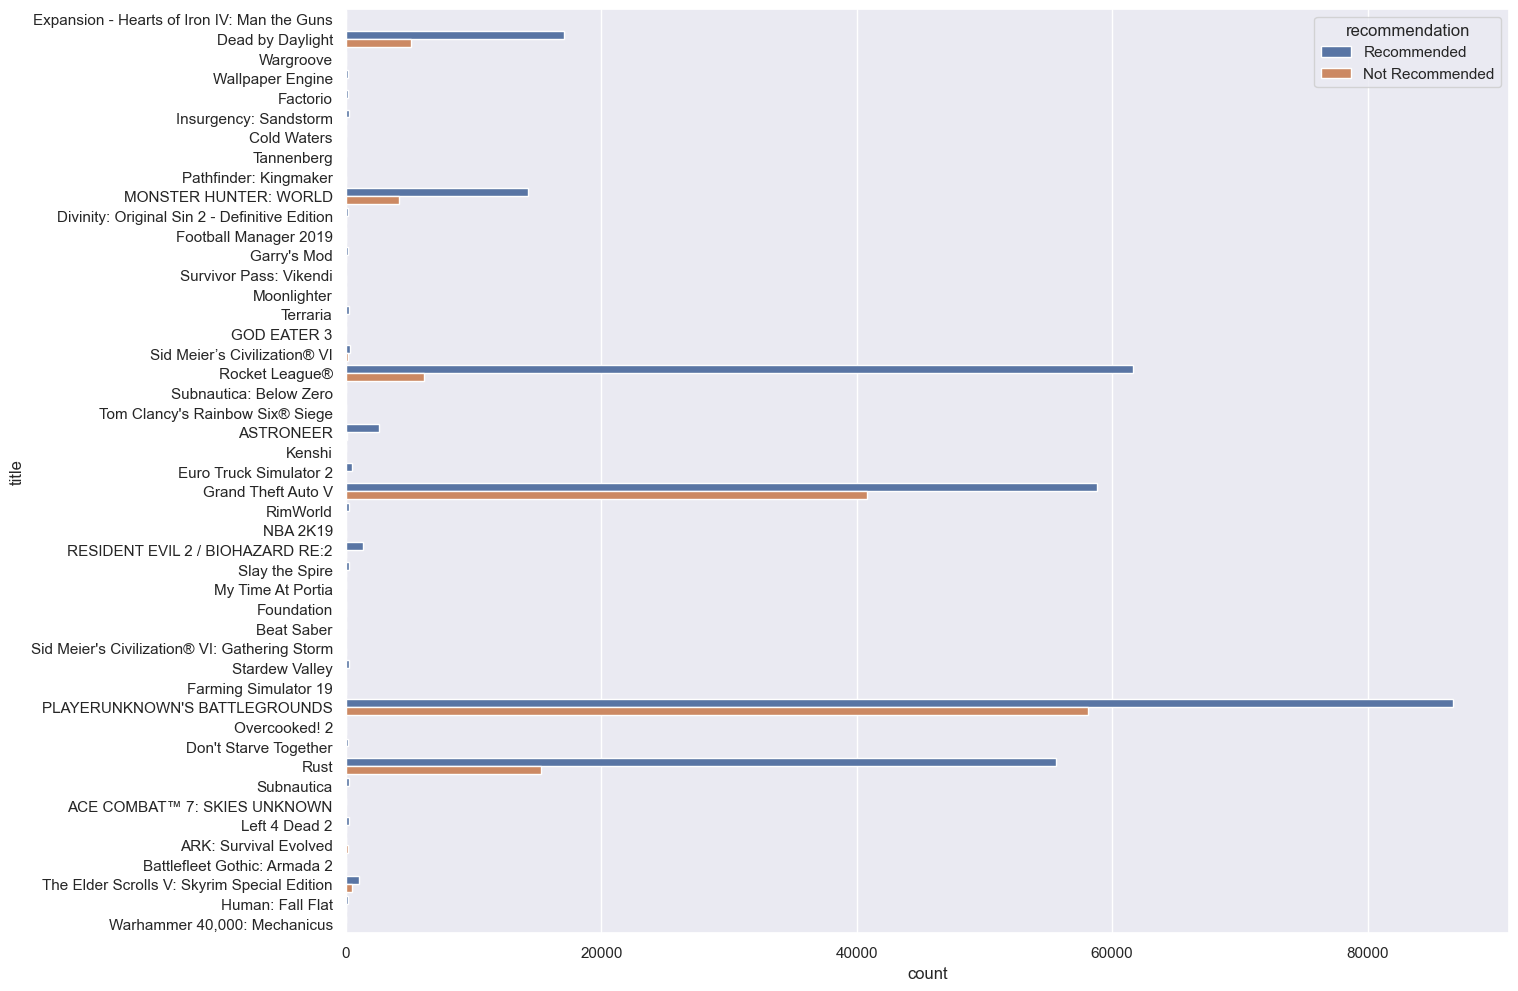

In [15]:
sns.set(rc = {'figure.figsize':(15,12)})   
sns.countplot(y = df["title"], hue = "recommendation", data = df)

#### Top 5 most reviewed games
In addition, I realized a pie plot that allowed us to figure out the number of reviews that each game received. For readability reasons, I decided to plot the five most reviewed games.

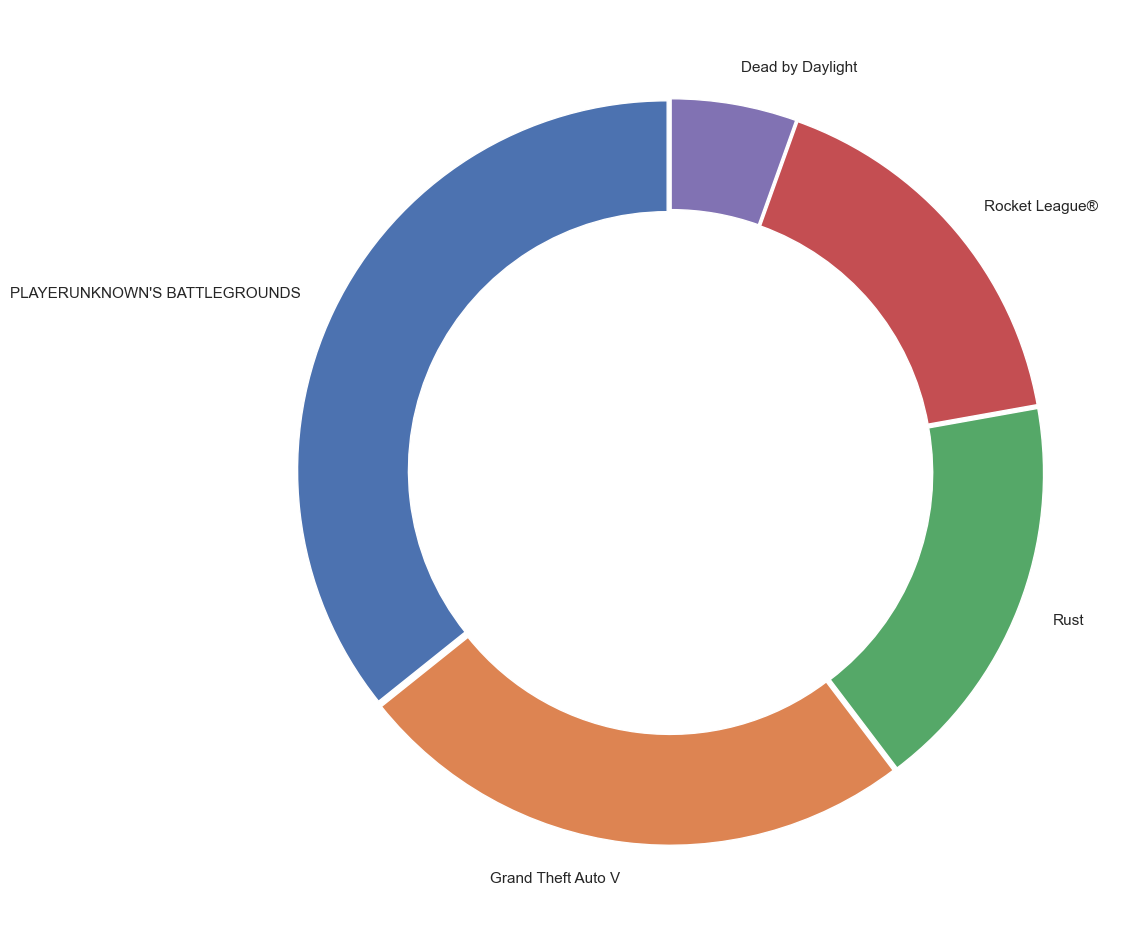

In [16]:
plt.pie(df["title"].value_counts()[0:5], labels = df["title"].value_counts().index[0:5], wedgeprops = {'width': 0.3}, radius = 1,
    explode=[0.01, 0.01, 0.01, 0.01, 0.01], startangle=90)
plt.show() 

#### Review words number 
The last graph is aimed to analyze the distribution of the number of words composing each review.

In [17]:
count = df["review"].str.split().str.len()
plot = pd.DataFrame(columns = ["CountWords"])
plot["CountWords"] = count

<Axes: xlabel='CountWords', ylabel='count'>

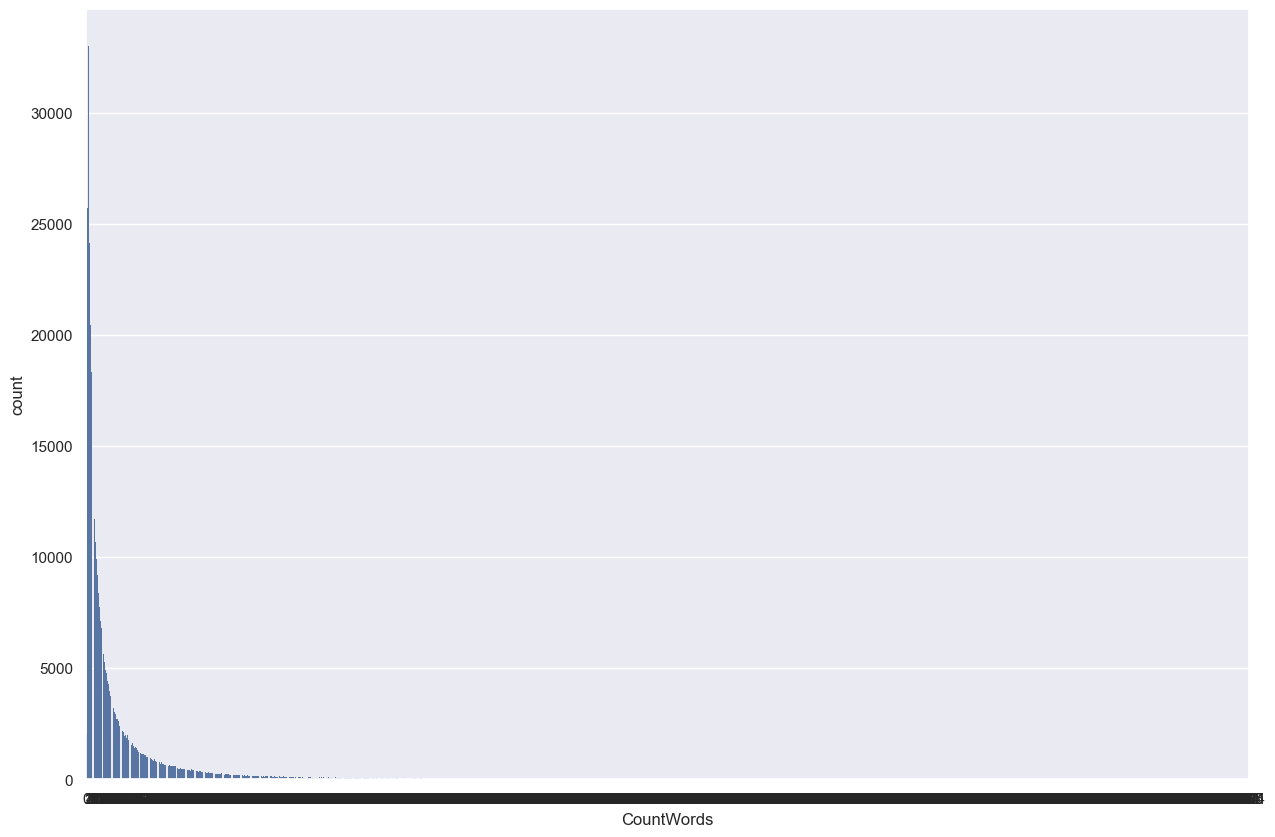

In [18]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(x = "CountWords", data = plot, linewidth=0, )

Due to the big number of unique review length values, I decided to take into account only the reviews having up to 80 words.

In [19]:
plot = plot[plot.CountWords < 80]

<Axes: xlabel='CountWords', ylabel='count'>

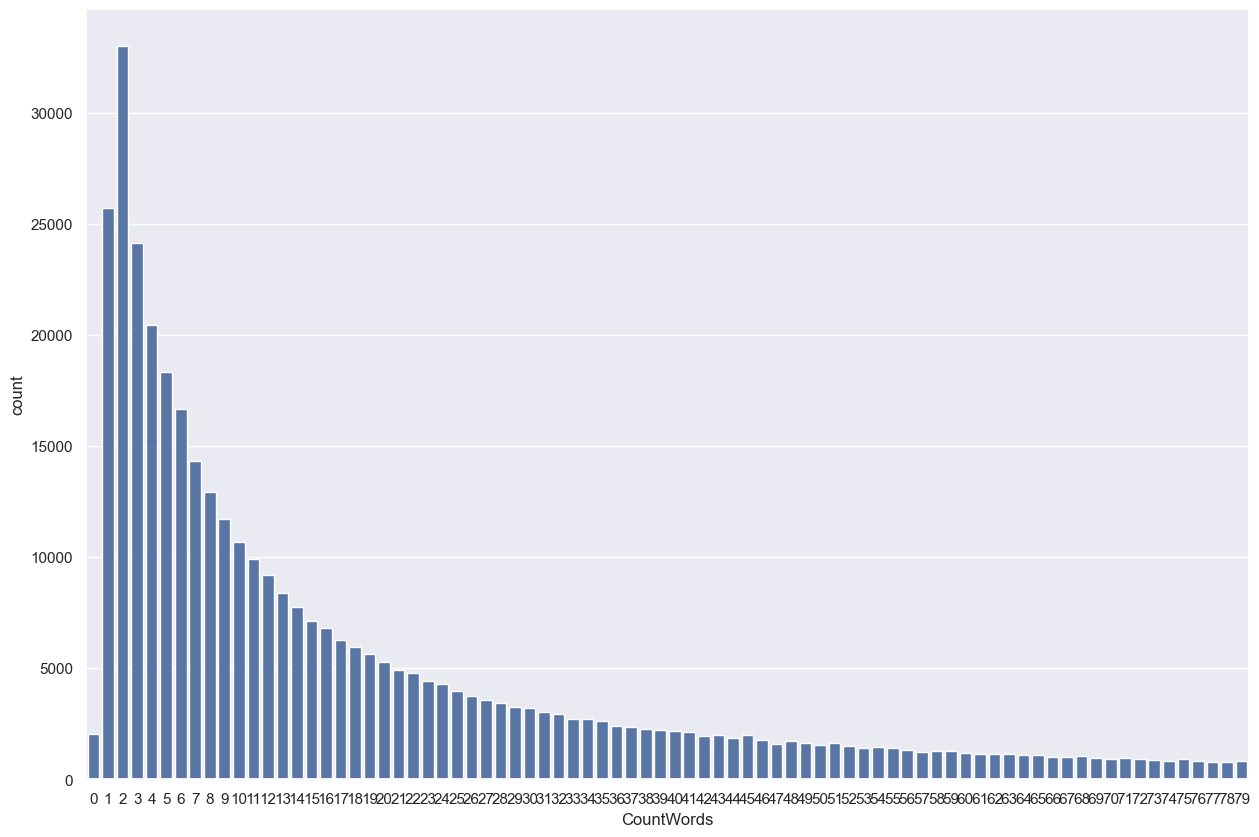

In [20]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(x = "CountWords", data = plot)

---
### <center> Tag Cloud

In this section I wanted to plot those which are the most common words used in the reviews.

In [21]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

I created a set of *stopwords* (available in the wordcloud library) in order to be able to remove the insignificant words like articles, pronouns, prepositions, and conjunctions from the reviews.

In [22]:
stopwords = set(STOPWORDS)

At this point, I created two lists:
* *textpos*, which contains the words from the reviews given by users recommending the game;
* *textneg* instead contains the words from the reviews given by users not recommending the game.

In [23]:
textpos = " ".join(df[df["recommendation"] == "Recommended"]["review"].tolist())
textneg = " ".join(df[df["recommendation"] == "Not Recommended"]["review"].tolist())

The two resulting lists were necessary for the implementation of the **WordCloud()** function and so to create a word cloud graph. 

The following cells represent the *recommended* and *not recommended* word clouds, respectively.

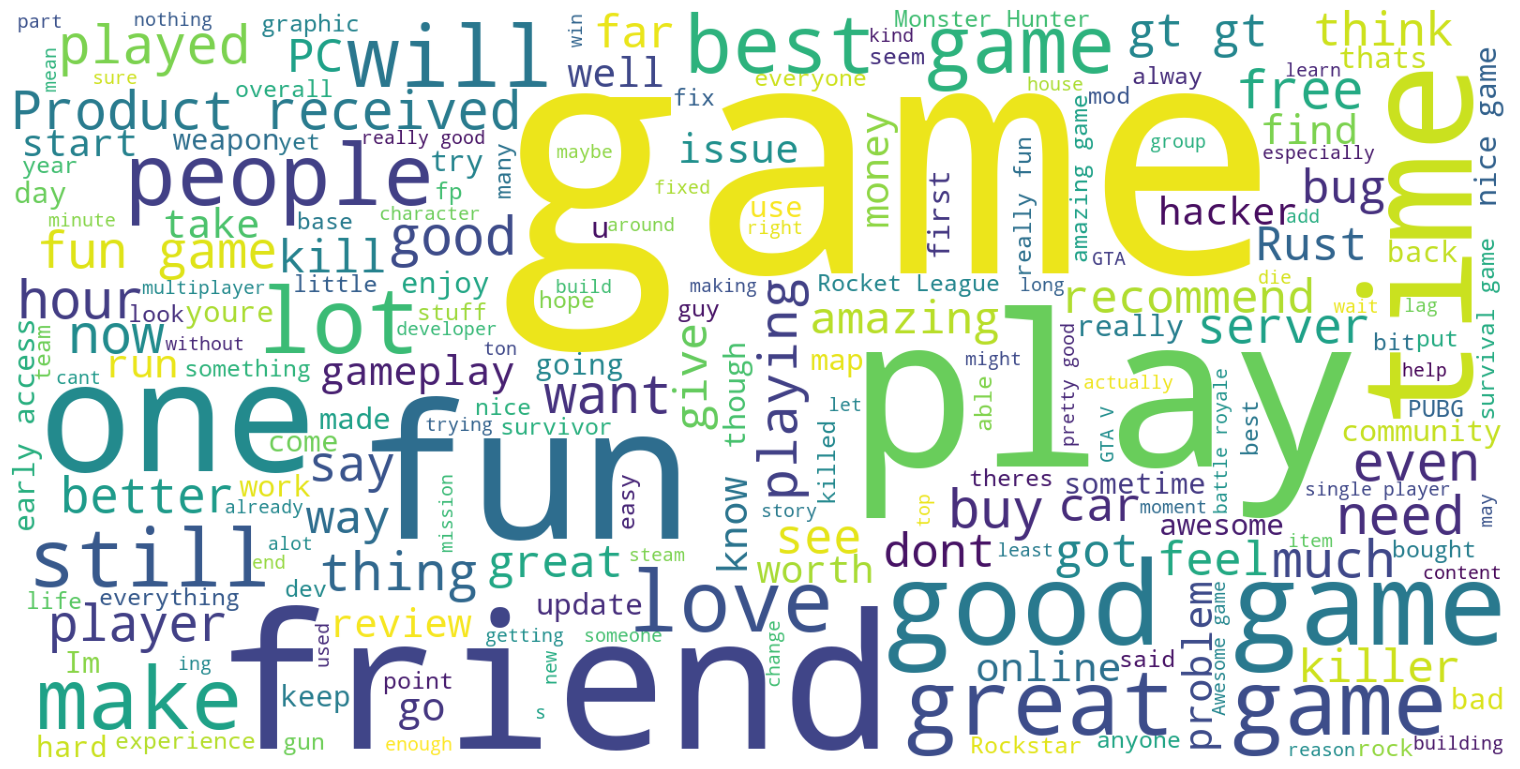

In [24]:
wordcloud = WordCloud(background_color = "white", width = 1600, height = 800).generate(textpos)
plt.figure(figsize = (15, 7.5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

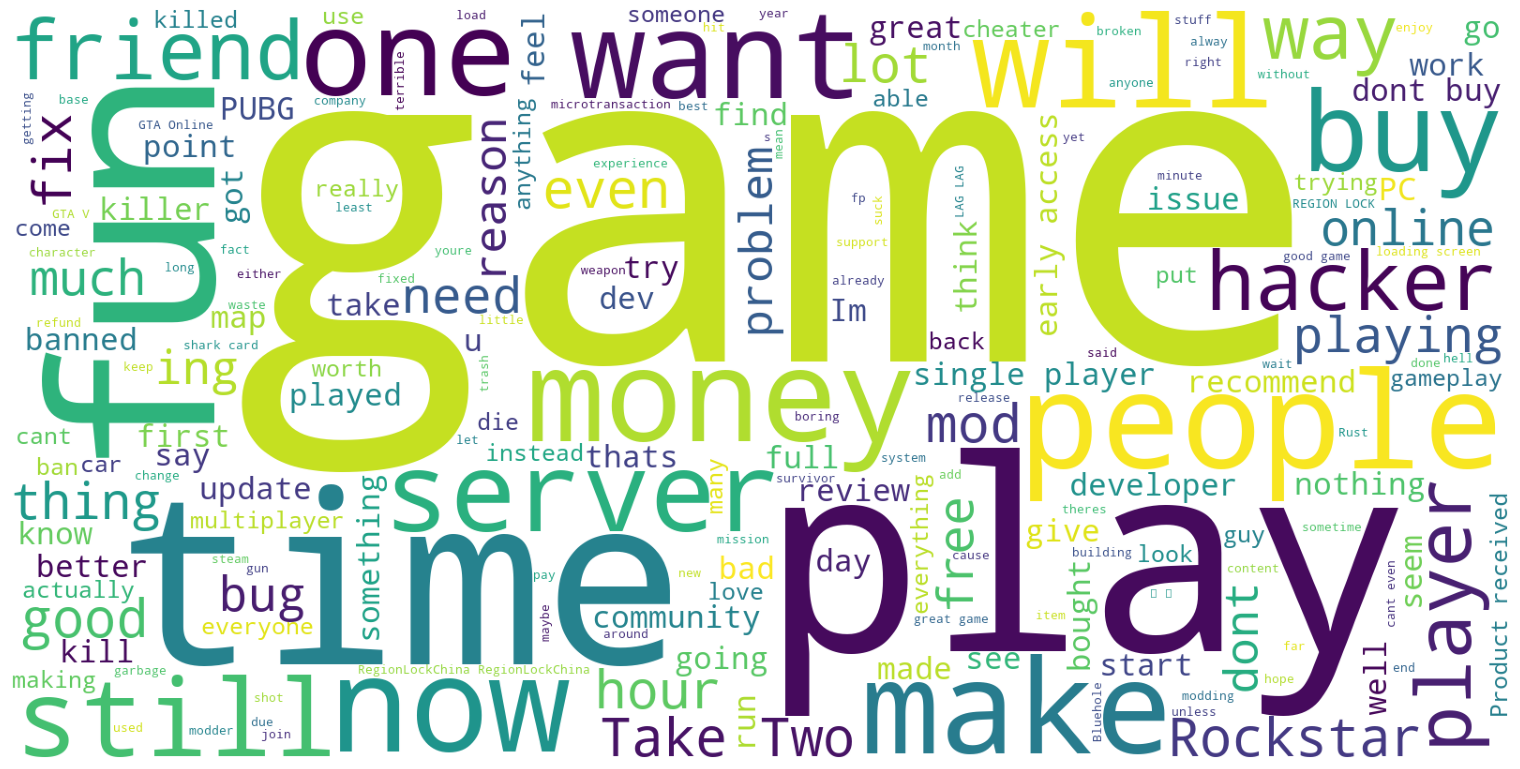

In [25]:
wordcloud = WordCloud(background_color = "white", width = 1600, height = 800).generate(textneg)
plt.figure(figsize = (15, 7.5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

---
### <center> Computing NLTK's Pre-Trained Sentiment Analyzer

In this phase, in order to compute the sentiment analysis, I took advantage of the NLTK library and, in particular, its built-in pretrained sentiment analyzer called **VADER** (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).

Being pretrained, VADER can get results more quickly than with many other analyzers. However, it works better with social media language, where the sentences are generally short and include slang and abbreviations, since with longer texts it's less accurate. 

The necessary library that have been imported to compute it properly is the `nltk.sentiment`.

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

Before starting, also the **vader_lexicon** list has been downloaded: a scored list of words and jargon that NLTK references when performing sentiment analysis

In [27]:
nltk.download(["vader_lexicon"])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nicolodellabianca/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

To use VADER, I defined a function called **SIA()**. It takes as input a string and, taking advanced of the execution of **.polarity_scores()** and the creation of an `nltk.sentiment.SentimentIntensityAnalyzer` instance, it returns a dictionary of different scores. In particular, the dictionary is composed by four scores:
* *negative*
* *neutral*
* *positive*
* *compound*

The negative, neutral, and positive scores are closely related, in fact they can’t be negative and the sum is always 1. The compound score instead, is calculated differently: it’s not just an average, but is the sum of positive, negative and neutral scores which is then normalized between -1 (most extreme negative) and +1 (most extreme positive).

Moreover, I adapted the compound score to our needs. This has been done thanks to the **Outcome()** function that, starting from a text as input, calls the abovementioned function and, depending on the compound score contained in the resulting dictionary, returns:
* *-1 (negative instance)*, compound score lower than 0; 
* *1 (positive instance)*, compound score greater than 0.

In [28]:
def SIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

In [29]:
def Outcome(text):
    dic = SIA(text)
    if dic["compound"] > 0:
        return 1
    return -1

Once the needed functions have been defined, I computed the analysis for each review contained in the dataset.

In [30]:
df["SentimentIntensityAnalyzer"] = [Outcome(review) for review in df["review"]]

In [31]:
df.head(5)

,funny,helpful,recommendation,review,title,SentimentIntensityAnalyzer
0,2,4,Recommended,gt Played as German Reichgt Declare war on Bel...,Expansion - Hearts of Iron IV: Man the Guns,1
1,0,0,Recommended,yes,Expansion - Hearts of Iron IV: Man the Guns,1
2,0,0,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,1
5,4,55,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight,-1
8,2,54,Recommended,Any longtime Dead by Daylight player knows tha...,Dead by Daylight,-1


Since this analysis is time-consuming, due to the big amount of data, I preferred  to compute it just once and save it in a new pickle file called *SIAdataset.pkl*. By doing so, I just have to open the created file. 

In [32]:
with open ("SIAdataset.pkl", "wb") as f:
    pickle.dump(df, f)

In [33]:
with open ("SIAdataset.pkl", "rb") as f:
    df = pickle.load(f)

---
### <center> Creation of a Sentiment Analysis Model

After the computation of the NLTK's Pre-Trained Sentiment Analyzer, I tried a completely different approach. 
Indeed, I built a simple sentiment analysis model that takes reviews as input. Then, it comes up with a prediction on whether the review is positive or negative.

Since this is a classification task, I decided to train a simple logistic regression model to do it. The choice of this particular model is due to the fact that **logistic regression** is the most useful algorithm for understanding the influence of several independent variables on a single outcome binary variable.

Firstly, I got rid of all the columns containing useless data (i.e. *funny*, *helpful*, *title*). Hence, the new data frame is now composed of only three columns: `review`, `recommendation`, `SentimentIntensityAnalyzer`.

In [34]:
dfTest = df.copy()
dfTest = dfTest.drop(["funny"],  axis = 1)
dfTest = dfTest.drop(["helpful"],  axis = 1)
dfTest = dfTest.drop(["title"],  axis = 1)

Then, I randomly created the train and test DataFrames.

To do so, I assigned to each row a random float number from 0 to 1. Subsequently, all the rows ranging from 0 to 0,9 have been used for the train DataFrame, while the remaining for the test DataFrame. In this way, about 90% of the data is used for training, and 10% is used for testing.

In [35]:
import random

In [36]:
dfTest["random"] = [random.random() for n in range(len(dfTest))]
train = dfTest[dfTest.random <= 0.9]
test = dfTest[dfTest.random > 0.9]

Next, I needed to convert the text into a *bag-of-words* model since the logistic regression cannot understand text.

Thus, I transformed the text of the reviews into a bag of words model, which contains a sparse matrix of integers. For this scope, I took advantage of the `sklearn.feature_extraction.text` **CountVectorizer()** method.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
vectorizer = CountVectorizer(token_pattern = r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train["review"])
test_matrix = vectorizer.transform(test["review"])

After importing the **LogisticRegression()** method from `sklearn.linear_model`, I applied it to both the *NLTK's Sentiment Analysis* and the *user recommendation*.

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 5000)

In [42]:
lrR = LogisticRegression(solver ="lbfgs", max_iter=5000)

In [43]:
X_train = train_matrix
X_test = test_matrix

In [44]:
y_train = train["SentimentIntensityAnalyzer"]
y_test = test["SentimentIntensityAnalyzer"]

In [45]:
y_trainR = train["recommendation"]
y_testR = test["recommendation"]

Through the **fit()** method I've been able to fit the model according to the training data.

In [46]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [47]:
lrR.fit(X_train,y_trainR)

LogisticRegression(max_iter=5000)

Finally, using the **predict()** method I successfully made predictions using the simple Logistic Regression model just created.

In [48]:
predictions = lr.predict(X_test)

In [49]:
predictionsR = lrR.predict(X_test)

---
### <center> Testing the model
The last step was to test the Logistic Regression model. To do so, I computed the **classification_report()** method. Also, to evaluate the accuracy of the classification I computed the confusion matrix through the **confusion_matrix()** method.

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

**NLTK's Sentiment Analysis Confusion Matrix and Classification Report**

<Axes: >

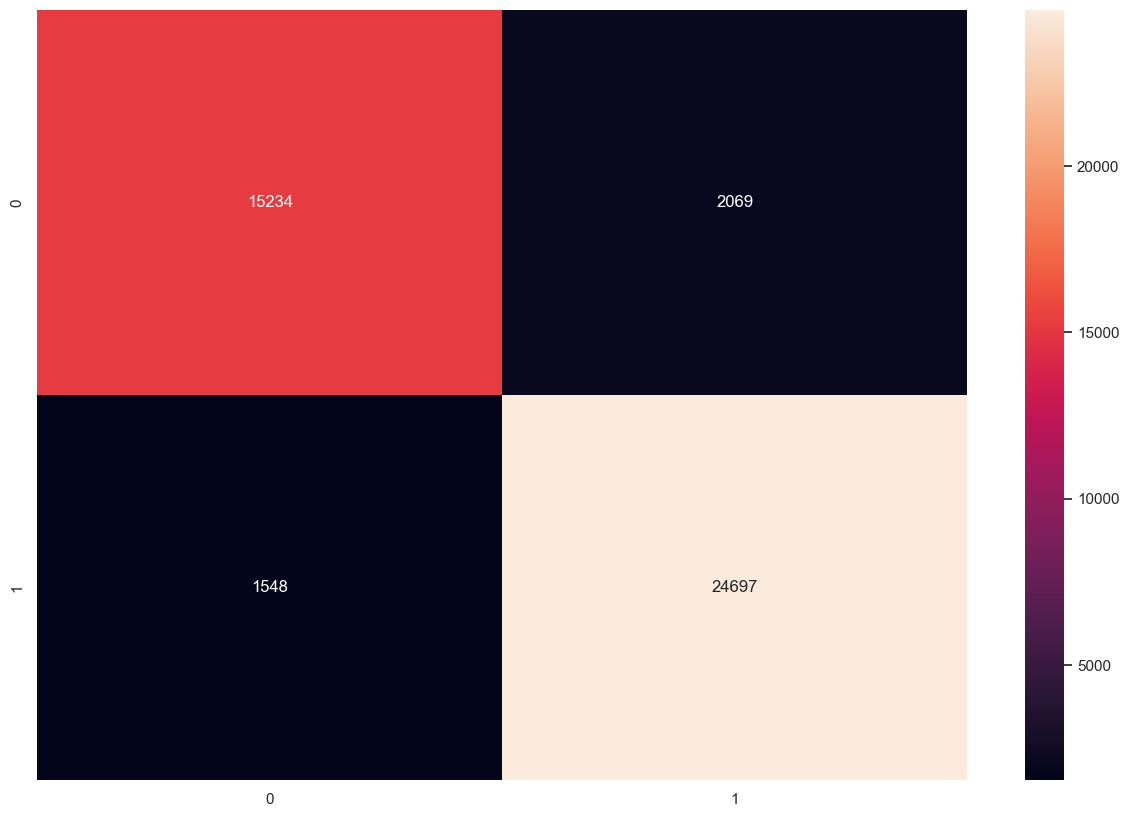

In [51]:
new = np.asarray(y_test)
cm = confusion_matrix(predictions,y_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [52]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.91      0.88      0.89     17303
           1       0.92      0.94      0.93     26245

    accuracy                           0.92     43548
   macro avg       0.92      0.91      0.91     43548
weighted avg       0.92      0.92      0.92     43548



The overall accuracy of the model on NLTK's Sentiment Analysis data is around 92%, which is pretty good considering we didn’t do much preprocessing on data.

**User recommendation Confusion Matrix and Classification Report**

<Axes: >

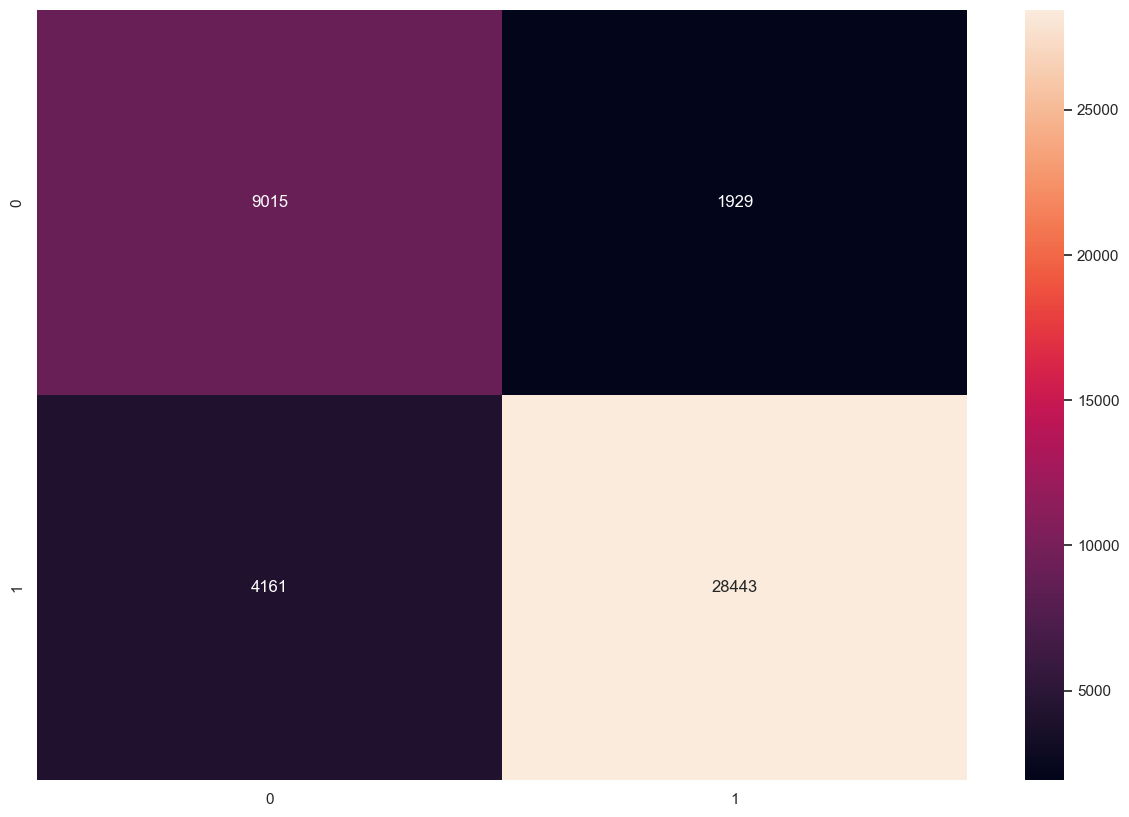

In [53]:
new = np.asarray(y_testR)
cm = confusion_matrix(predictionsR,y_testR)
sns.heatmap(cm, annot = True, fmt = "d")

In [54]:
print(classification_report(predictionsR,y_testR))

                 precision    recall  f1-score   support

Not Recommended       0.68      0.82      0.75     10944
    Recommended       0.94      0.87      0.90     32604

       accuracy                           0.86     43548
      macro avg       0.81      0.85      0.83     43548
   weighted avg       0.87      0.86      0.86     43548



As regards the User recommendation data, its accuracy is about 86%. 

Comparing the two classifications, it's evident how the application of the model on NLTK's Sentiment Analysis data results more accurate in terms of prediction. This could be related to the fact that the first model reflects the behaviour of the `NLTK` **VADER Analyzer** making its common mistakes.  

---
### <center> Conclusions

Even though sentiment analysis is very useful to study people's opinion and emotions, it also presents some pitfalls that require some more attention.

For instance, sentiment analysis is not able to detect by itself irony and sarcasm, types of negotiation, word ambiguity and multipolarity. However, this issue could be solved applying proper machine learning and deep learning algorithms.

In order to show this problem, we reported an example of inability to distinguish a sarcastic review from a serious one.

In [55]:
print(SIA("This game has fantastic gameplay, it lasts 27 hours"))
print(SIA("This game has fantastic gameplay, it lasts 1 minute !11!!1"))

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.6679}


As we can see, although the results are exactly the same, the meaning of the second phrase is sarcastic.

In order to find out whether the solution that I provided can be considered reliable or not, I compared it with the recommendations already given by the users. In fact, we want to comprehend how much the above described issues affect our analysis.

In [56]:
print(df["recommendation"].value_counts())
print(df["SentimentIntensityAnalyzer"].value_counts())

recommendation
Recommended        302465
Not Recommended    130522
Name: count, dtype: int64
SentimentIntensityAnalyzer
 1    266092
-1    166895
Name: count, dtype: int64


Aiming to discover whether there is a relationship between possible incorrect analysis and sarcastic reviews, I took advantage of the number of users who consider the review funny, thanks to the value of the related `funny` column. In fact, reviews that are highly rated as funny are often sarcastic. To do so, I created two lists, *match* and *not_match*.

In [57]:
match = []
not_match = []
for f, r, s in zip(df["funny"], df["recommendation"], df["SentimentIntensityAnalyzer"]):
    if f > 0:
        if r == "Recommended" and s == 1:
            match.append(f)
        if r == "Not Recommended" and s == -1:
            match.append(f)
        else:
            not_match.append(f)

As imaginable, the reviews that are most likely causing errors in the analysis are those that are considered to be the most entertaining. I deduced this from the mean calculation of the lists created earlier.

In [58]:
from statistics import mean

In [59]:
print(mean(match))
print(mean(not_match))

3.3820562256198716
4.617886178861789


**Going back to the classification reports of the previously created models, the difference in forecast accuracy may be due to these typical errors that plague this type of analysis.**